# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [1]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

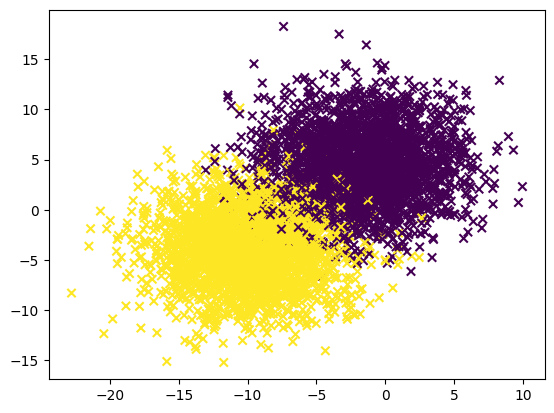

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Bonus: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Bonus: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution


In [5]:
import numpy as np

ones = np.ones(X.shape[0])
X_mat = np.c_[X, ones]
weights = (np.linalg.pinv(X_mat.T @ X_mat) @ X_mat.T) @ y

predictions = X_mat @ weights

In [6]:

predict_labels = (predictions >= 0.5).astype(int)  

# CLassification Accuracy Calculation
n_correct_clf = np.count_nonzero(predict_labels==y)
n_incorrect_clf = y.shape[0]-n_correct_clf
print(n_correct_clf)
print(n_incorrect_clf)
Clf_Accuracy = (n_correct_clf/(n_correct_clf+n_incorrect_clf))
print("Classification Accuracy : ", Clf_Accuracy)

4793
207
Classification Accuracy :  0.9586


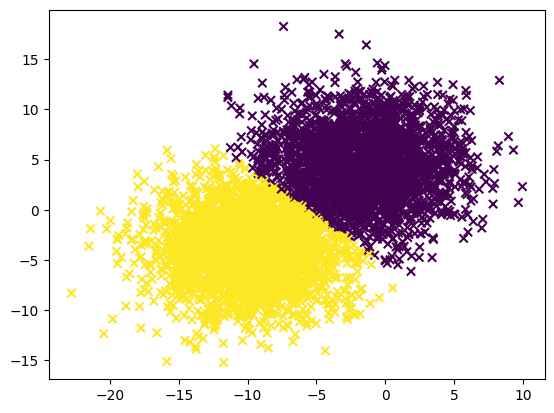

In [7]:
# Visualize the learned classification
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predict_labels, marker="x")
plt.show()

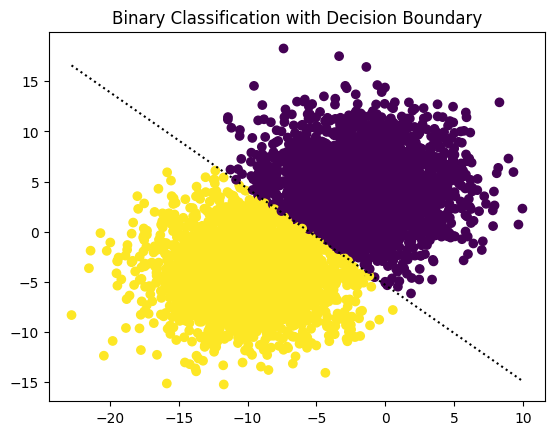

In [16]:
# Plot the decision boundary line
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predict_labels, marker="o")

# Calculate the slope and intercept of the decision boundary line
w0, w1, b = weights[0], weights[1], weights[2]
slope = -w0 / w1
intercept = (0.5-b) / w1

def decision_boundary(x):
    return slope * x + intercept

x_range = np.linspace(X[:, 0].min(), X[:, 0].max())
y_line = decision_boundary(x_range)

# Plot the decision boundary line
plt.plot(x_range, y_line, linestyle='dotted', color='black', label='Decision Boundary')
plt.title('Binary Classification with Decision Boundary')
plt.show()

In [17]:
# Classification report using sklearn
from sklearn.metrics import classification_report, precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt  
print("Classification Report:")
print(classification_report(y, predict_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2500
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



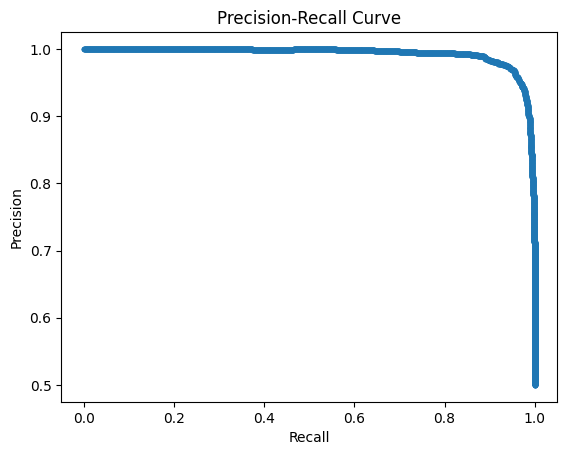

Avg Precision: 0.9926845643768483


In [18]:
# Precision-Recall Curve using sklearn
y_predict = np.matmul(X_mat, weights)
y_true = y


precision, recall, thresholds = precision_recall_curve(y_true, y_predict)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Avg Precision:",average_precision_score(y_true, y_predict))

In [19]:
# Definition of function classification_report without sklearn

from tabulate import tabulate

def classification_report(y_true, y_pred):
    # Create a set of unique class labels
    unique_labels = set(y_true + y_pred)

    report = []

    for label in unique_labels:
        true_pos = sum(1 for true, pred in zip(y_true, y_pred) if true == label and pred == label)
        false_pos = sum(1 for true, pred in zip(y_true, y_pred) if true != label and pred == label)
        false_neg= sum(1 for true, pred in zip(y_true, y_pred) if true == label and pred != label)

        precision = true_pos/ (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
        recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = true_pos + false_neg

        report.append([label, f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}", support])

    headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    table = tabulate(report, headers, tablefmt="pretty")
    return table



In [20]:
predictions = np.matmul(X_mat, weights)
y_pred = (predictions >= 0.5).astype(int)
y_true = y

report_table = classification_report(y_true, y_pred)
print(report_table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |  0.9584   | 0.9588 |  0.9586  |  2500   |
|   1   |  0.9588   | 0.9584 |  0.9586  |  2500   |
|   2   |  0.0000   | 0.0000 |  0.0000  |    0    |
+-------+-----------+--------+----------+---------+


In [21]:

def precision_recall_curve(y_true, y_scores):
    sorted_data = sorted(zip(y_scores, y_true), reverse=True)
    threshold, precision, recall = 0, [], []
    true_pos, false_pos= 0, 0
    num_positives = sum(y_true)

    for score, label in sorted_data:
        if label == 1:
            true_pos += 1
        else:
            false_pos += 1
        threshold = score
        precision.append(true_pos / (true_pos + false_pos))
        recall.append(true_pos / num_positives)

    return precision, recall

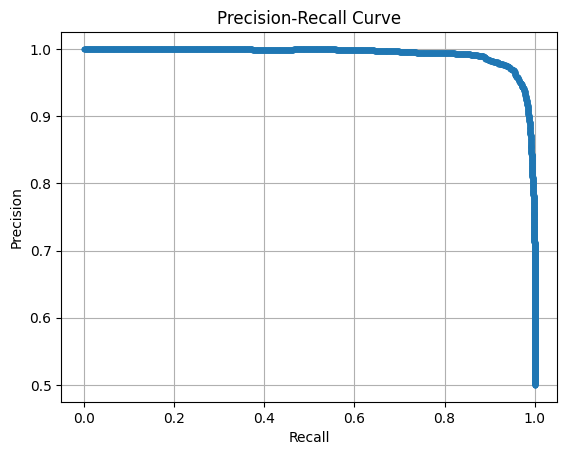

In [22]:

y_predict = np.matmul(X_mat, weights)
y_true = y

precision, recall = precision_recall_curve(y_true, y_predict)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()